### Relation between Socioeconimic Factors, Age, Sex and Suicide Rates

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('Data/suicide_rates_1990-2022.csv')

In [3]:
print("Shape = ", data.shape)
print('\n')
print(data.head())
print('\n')
print("Columns = ", data.columns)

data.dropna(subset=['SuicideCount'], inplace=True)
data.isna().any()

Shape =  (118560, 18)


  RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
0         EU     Europe         ALB     Albania  1992  Male   0-14 years   
1         EU     Europe         ALB     Albania  1992  Male   0-14 years   
2         EU     Europe         ALB     Albania  1992  Male   0-14 years   
3         EU     Europe         ALB     Albania  1992  Male   0-14 years   
4         EU     Europe         ALB     Albania  1992  Male  15-24 years   

         Generation  SuicideCount  CauseSpecificDeathPercentage  \
0  Generation Alpha           0.0                      0.000000   
1  Generation Alpha           0.0                      0.000000   
2  Generation Alpha           0.0                      0.000000   
3  Generation Alpha           0.0                      0.000000   
4      Generation Z           5.0                      3.401361   

   DeathRatePer100K  Population          GDP  GDPPerCapita  \
0          0.000000   3247039.0  652174990.8     200.8

RegionCode                      False
RegionName                      False
CountryCode                     False
CountryName                     False
Year                            False
Sex                             False
AgeGroup                        False
Generation                      False
SuicideCount                    False
CauseSpecificDeathPercentage     True
DeathRatePer100K                 True
Population                       True
GDP                              True
GDPPerCapita                     True
GrossNationalIncome              True
GNIPerCapita                     True
InflationRate                    True
EmploymentPopulationRatio        True
dtype: bool

In [4]:
# Descriptive statistics
data.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118096.000000,118096.000000,114271.000000,107896.000000,1.121760e+05,1.108560e+05,110856.000000,1.081360e+05,107336.000000,103654.000000,107344.000000
mean,2005.725156,63.632037,3.873690,12.299791,2.464948e+07,4.902804e+11,17442.061189,4.997162e+11,22143.823321,20.350986,55.745953
std,8.748297,254.095408,7.317820,21.016170,4.537588e+07,1.656424e+12,19364.810767,1.692916e+12,18907.727579,163.446373,8.133595
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.676863e+06,1.178493e+10,3934.690909,1.189299e+10,8650.000000,1.500125,50.791000
50%,2006.000000,4.000000,0.586166,4.452366,6.932636e+06,6.391870e+10,9659.338900,6.002684e+10,16100.000000,3.038888,56.019000
75%,2013.000000,32.000000,4.355646,15.384615,2.556765e+07,3.014580e+11,25252.801910,3.063030e+11,29570.000000,6.550973,60.411250
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [5]:
# Number of Suicides by region
data.groupby(['RegionName']).sum(numeric_only=True)['SuicideCount']

RegionName
Africa                               15592.0
Asia                               1665543.0
Central and South America           748702.0
Europe                             3624527.0
North America and the Caribbean    1363995.0
Oceania                              96330.0
Name: SuicideCount, dtype: float64

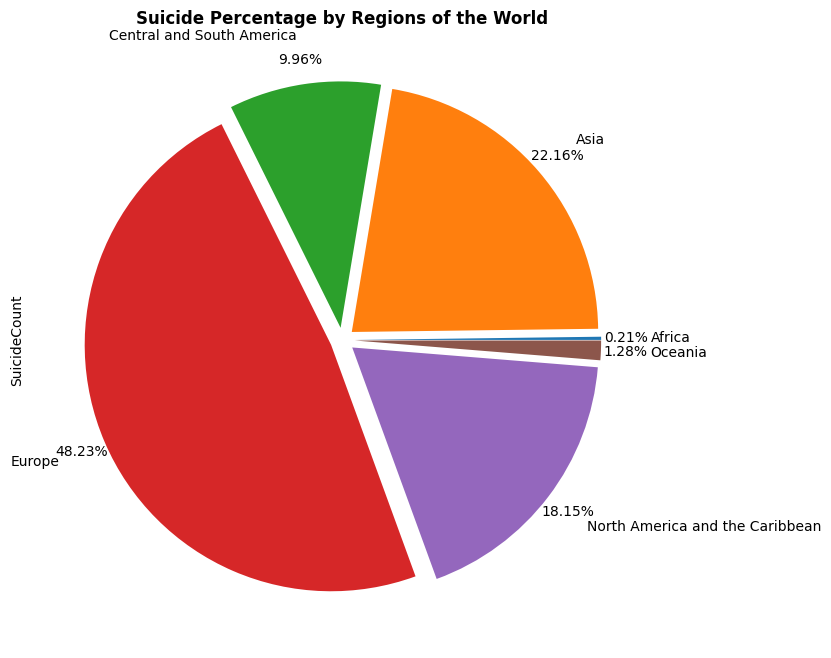

In [6]:
# Plot Suicide Percentage by Region
explode = np.full(len(data['RegionName'].unique()), 0.05)
data.groupby(['RegionName']).sum(numeric_only=True).plot.pie(
    y='SuicideCount', 
    figsize=(15,8), 
    autopct='%.2f%%', 
    explode=explode,
    pctdistance=1.1, 
    labeldistance=1.2
    )
plt.title("Suicide Percentage by Regions of the World", fontweight="bold")
plt.legend().remove()
plt.show()

In [7]:
# Percentage of Suicides by country
by_country = data.groupby(['CountryName']).sum(numeric_only=True)
count_sum = by_country['SuicideCount'].sum()
by_country['Percentage'] = by_country['SuicideCount'].apply(lambda x: (x/count_sum)*100)

print("Percentage of Suicides by Country")
by_country['Percentage'].sort_values(ascending=False)

Percentage of Suicides by Country


CountryName
Russian Federation          16.719787
United States of America    15.499417
Japan                       10.870550
Germany                      4.498350
Republic of Korea            4.338436
                              ...    
Grenada                      0.000439
Saint Kitts and Nevis        0.000186
Antigua and Barbuda          0.000173
Mayotte                      0.000160
Iraq                         0.000133
Name: Percentage, Length: 117, dtype: float64

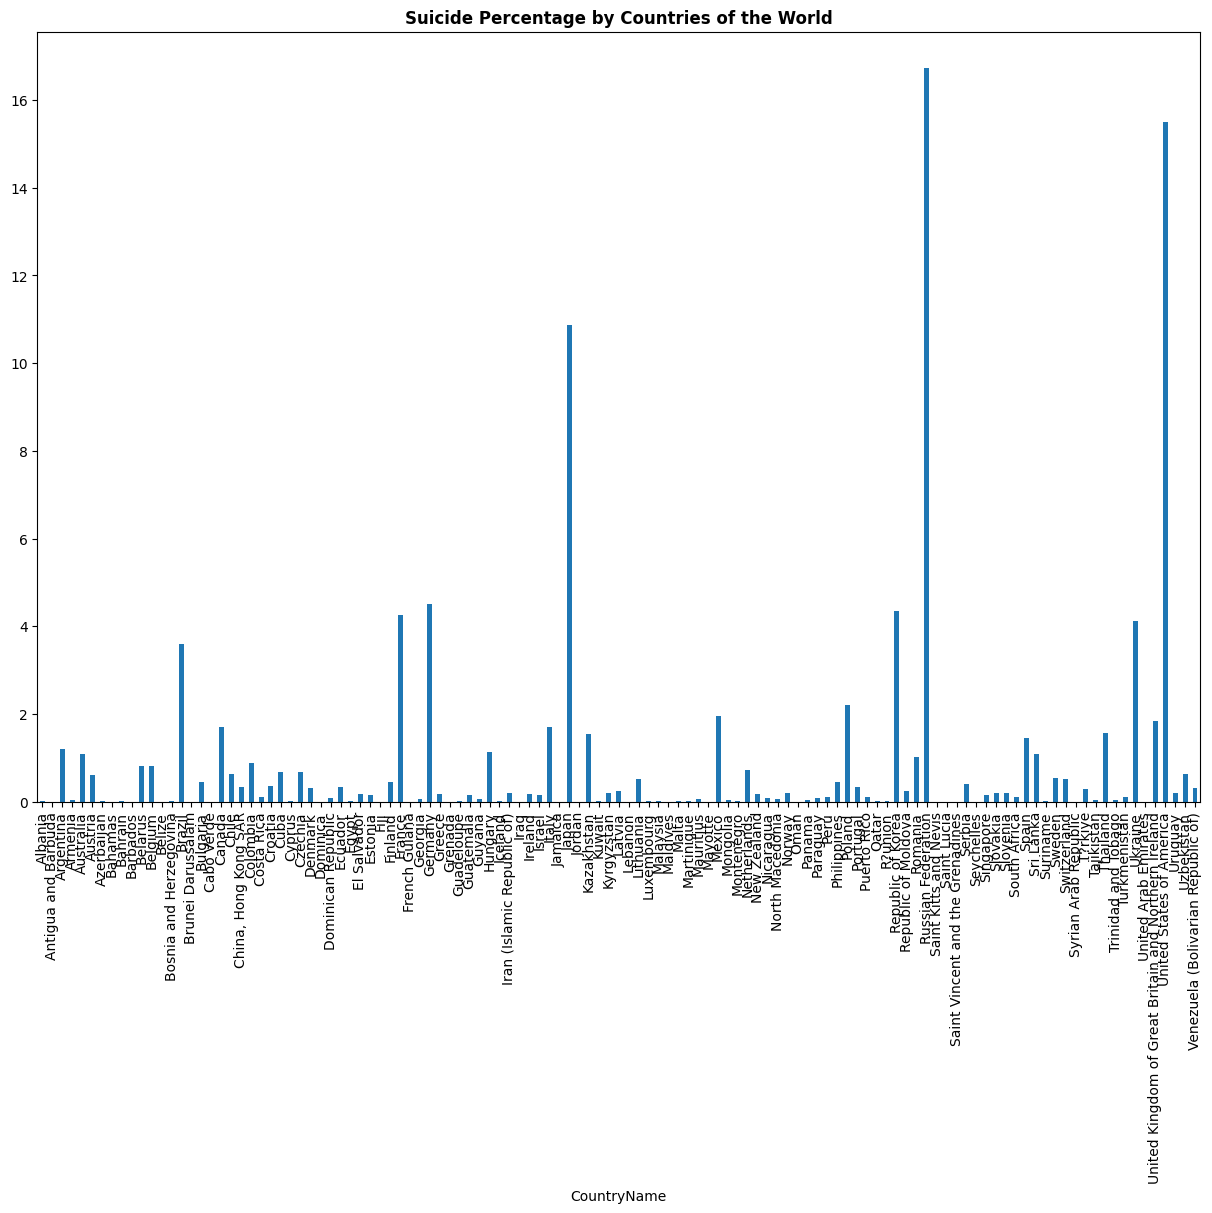

In [8]:
# Plot Suicide Percentage by country
by_country['Percentage'].plot(
    kind='bar',
    figsize=(15,10)
    )
plt.title("Suicide Percentage by Countries of the World", fontweight="bold")
plt.legend().remove()
plt.show()

<AxesSubplot: xlabel='Year'>

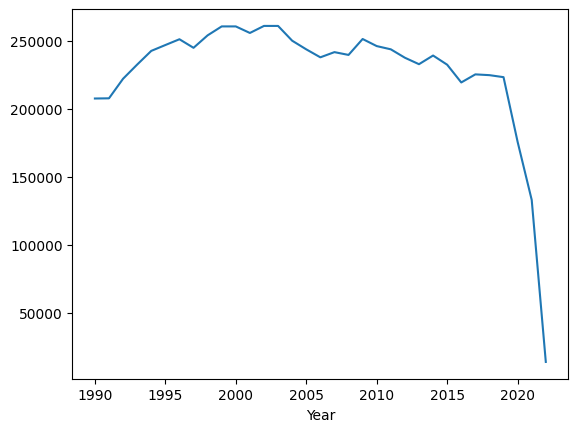

In [9]:
by_year = data.groupby(['Year']).sum(numeric_only=True)['SuicideCount']
by_year.plot(kind='line')

In [10]:
by_year

Year
1990    207445.0
1991    207584.0
1992    221963.0
1993    232369.0
1994    242419.0
1995    246721.0
1996    250971.0
1997    244684.0
1998    253835.0
1999    260404.0
2000    260399.0
2001    255585.0
2002    260762.0
2003    260753.0
2004    249909.0
2005    243557.0
2006    237695.0
2007    241510.0
2008    239457.0
2009    251156.0
2010    245953.0
2011    243574.0
2012    237397.0
2013    232651.0
2014    239013.0
2015    232275.0
2016    219232.0
2017    225172.0
2018    224599.0
2019    223129.0
2020    175606.0
2021    132955.0
2022     13955.0
Name: SuicideCount, dtype: float64

In [11]:
country_year = data.groupby(['CountryName', 'Year'])['SuicideCount'].sum(numeric_only=True)
country_year.head(50)

CountryName          Year
Albania              1992      47.0
                     1993      73.0
                     1994      52.0
                     1995      91.0
                     1996      92.0
                     1997     176.0
                     1998     165.0
                     1999     154.0
                     2000      57.0
                     2001     119.0
                     2002     133.0
                     2003     124.0
                     2004     146.0
                     2005       0.0
                     2006       0.0
                     2007     124.0
                     2008     160.0
                     2009       0.0
                     2010      96.0
Antigua and Barbuda  1990       1.0
                     1991       0.0
                     1992       0.0
                     1993       1.0
                     1994       0.0
                     1995       0.0
                     1998       0.0
                     1999       0.0
  

In [12]:
country_year.tail(50)

CountryName                         Year
Uzbekistan                          1992    1348.0
                                    1993    1356.0
                                    1994    1420.0
                                    1995    1486.0
                                    1996    1701.0
                                    1997    1554.0
                                    1998    1620.0
                                    1999    1795.0
                                    2000    1919.0
                                    2001    1914.0
                                    2002    1576.0
                                    2003    1417.0
                                    2004    1251.0
                                    2005    1221.0
                                    2009    1400.0
                                    2010    1464.0
                                    2011    1640.0
                                    2012    1835.0
                                    2013 

In [13]:
country_year.max()

61886.0

In [14]:
data['Sex'].value_counts()

Male       58088
Female     58088
Unknown     1920
Name: Sex, dtype: int64

In [15]:
data.groupby(['Sex']).sum(numeric_only=True)['SuicideCount']

Sex
Female     1711778.0
Male       5802572.0
Unknown        339.0
Name: SuicideCount, dtype: float64

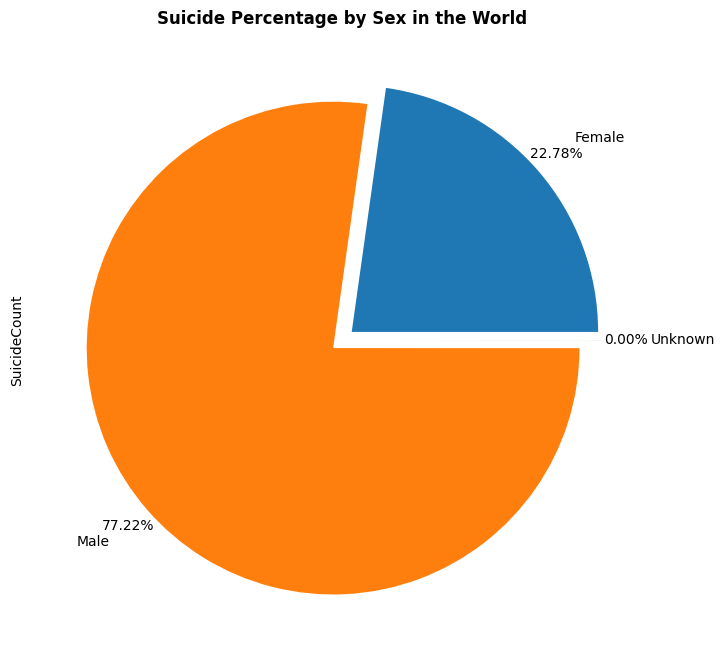

In [16]:
# Plot Suicide Percentage by Sex
explode = np.full(len(data['Sex'].unique()), 0.05)
data.groupby(['Sex']).sum(numeric_only=True).plot.pie(
    y='SuicideCount', 
    figsize=(15,8), 
    autopct='%.2f%%', 
    explode=explode,
    pctdistance=1.1, 
    labeldistance=1.2
    )
plt.title("Suicide Percentage by Sex in the World", fontweight="bold")
plt.legend().remove()
plt.show()

In [17]:
country_sex = data.groupby(['CountryName', 'Sex'])['SuicideCount'].sum(numeric_only=True)
country_sex.head(50)

CountryName             Sex    
Albania                 Female        641.0
                        Male         1168.0
Antigua and Barbuda     Female          1.0
                        Male           12.0
Argentina               Female      18725.0
                        Male        71264.0
                        Unknown       180.0
Armenia                 Female        549.0
                        Male         1649.0
Australia               Female      18655.0
                        Male        63549.0
Austria                 Female      11425.0
                        Male        34320.0
Azerbaijan              Female        412.0
                        Male         1244.0
Bahamas                 Female         15.0
                        Male           83.0
Bahrain                 Female         76.0
                        Male          353.0
Barbados                Female         23.0
                        Male          105.0
Belarus                 Female      10358.0


In [18]:
country_sex.tail(50)

CountryName                                           Sex    
Serbia                                                Male        22266.0
Seychelles                                            Female         13.0
                                                      Male          104.0
Singapore                                             Female       3851.0
                                                      Male         6864.0
Slovakia                                              Female       2390.0
                                                      Male        13330.0
Slovenia                                              Female       3399.0
                                                      Male        12132.0
South Africa                                          Female       1861.0
                                                      Male         6614.0
                                                      Unknown        17.0
Spain                                             

In [19]:
# To check if any country has higher female suicides
female_suicide = []
for i in data['CountryName'].unique():
    temp = country_sex.loc[i]
    if temp.loc['Female'] > temp.loc['Male']:
        female_suicide.append(i)
    else:
        pass
print(female_suicide)

[]


In [20]:
data['AgeGroup'].unique()

array(['0-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years', 'Unknown'], dtype=object)

In [21]:
data.groupby(['AgeGroup']).sum(numeric_only=True)['SuicideCount']

AgeGroup
0-14 years       62986.0
15-24 years     894054.0
25-34 years    1234669.0
35-54 years    2716429.0
55-74 years    1854582.0
75+ years       734862.0
Unknown          17107.0
Name: SuicideCount, dtype: float64

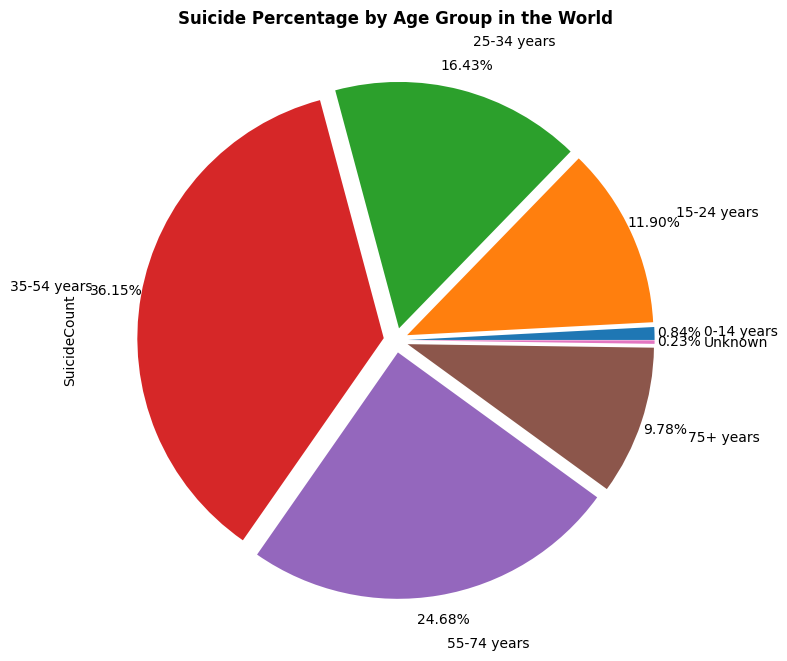

In [22]:
# Plot Suicide Percentage by Sex
explode = np.full(len(data['AgeGroup'].unique()), 0.05)
data.groupby(['AgeGroup']).sum(numeric_only=True).plot.pie(
    y='SuicideCount', 
    figsize=(15,8), 
    autopct='%.2f%%', 
    explode=explode,
    pctdistance=1.1, 
    labeldistance=1.2
    )
plt.title("Suicide Percentage by Age Group in the World", fontweight="bold")
plt.legend().remove()
plt.show()

In [23]:
country_age = data.groupby(['CountryName', 'AgeGroup'])['SuicideCount'].sum(numeric_only=True)
country_age.head(50)

CountryName          AgeGroup   
Albania              0-14 years        61.0
                     15-24 years      469.0
                     25-34 years      384.0
                     35-54 years      529.0
                     55-74 years      249.0
                     75+ years         74.0
                     Unknown           43.0
Antigua and Barbuda  0-14 years         0.0
                     15-24 years        1.0
                     25-34 years        1.0
                     35-54 years        7.0
                     55-74 years        4.0
                     75+ years          0.0
                     Unknown            0.0
Argentina            0-14 years      1677.0
                     15-24 years    21221.0
                     25-34 years    16035.0
                     35-54 years    23318.0
                     55-74 years    19321.0
                     75+ years       7948.0
                     Unknown          649.0
Armenia              0-14 years        26.0

In [24]:
country_age.tail(50)

CountryName                                           AgeGroup   
Turkmenistan                                          Unknown             9.0
Ukraine                                               0-14 years       1816.0
                                                      15-24 years     26760.0
                                                      25-34 years     47922.0
                                                      35-54 years    119470.0
                                                      55-74 years     87214.0
                                                      75+ years       25036.0
                                                      Unknown           930.0
United Arab Emirates                                  0-14 years          2.0
                                                      15-24 years        55.0
                                                      25-34 years       158.0
                                                      35-54 years       134.

Text(0.5, 1.0, 'Suicide Count by Age Group and Sex in the World')

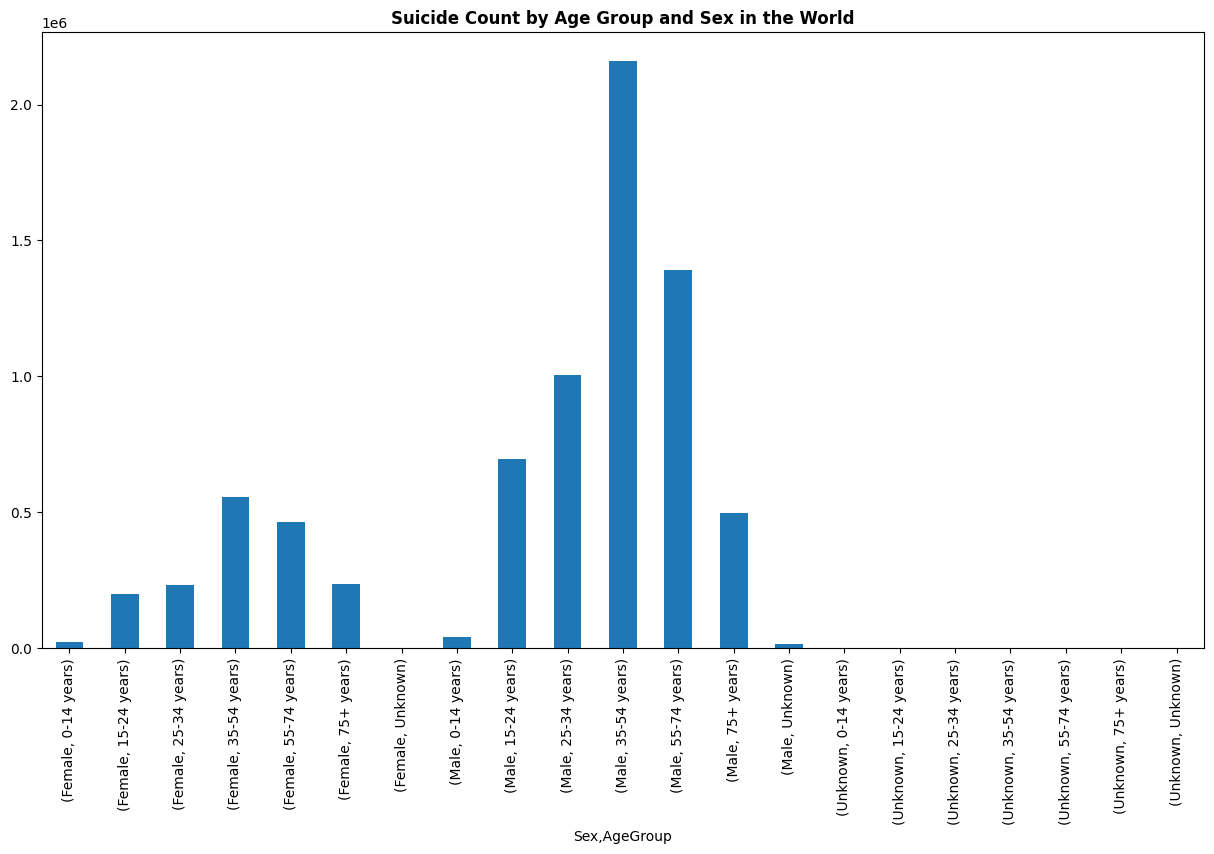

In [25]:
sex_age = data.groupby(['Sex', 'AgeGroup'])['SuicideCount'].sum(numeric_only=True)
sex_age.plot.bar(y='SuicideCount', figsize=(15,8))
plt.title("Suicide Count by Age Group and Sex in the World", fontweight="bold")

In [26]:
countries_list = data['CountryName'].unique()
print(countries_list)
print('Number of Countries =',len(countries_list))

['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bahamas' 'Antigua and Barbuda' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Cabo Verde' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Georgia' 'Germany' 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guyana'
 'China, Hong Kong SAR' 'Hungary' 'Iceland' 'Iran (Islamic Republic of)'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan'
 'Republic of Korea' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Maldives' 'Malta' 'Martinique' 'Mauritius' 'Mayotte'
 'Mexico' 'Republic of Moldova' 'Montenegro' 'Netherlands' 'New Zealand'
 'Nicaragua' 'North Macedonia' 'Norway' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Puerto Rico' 'R?union' 'Romania'
 'Russian 

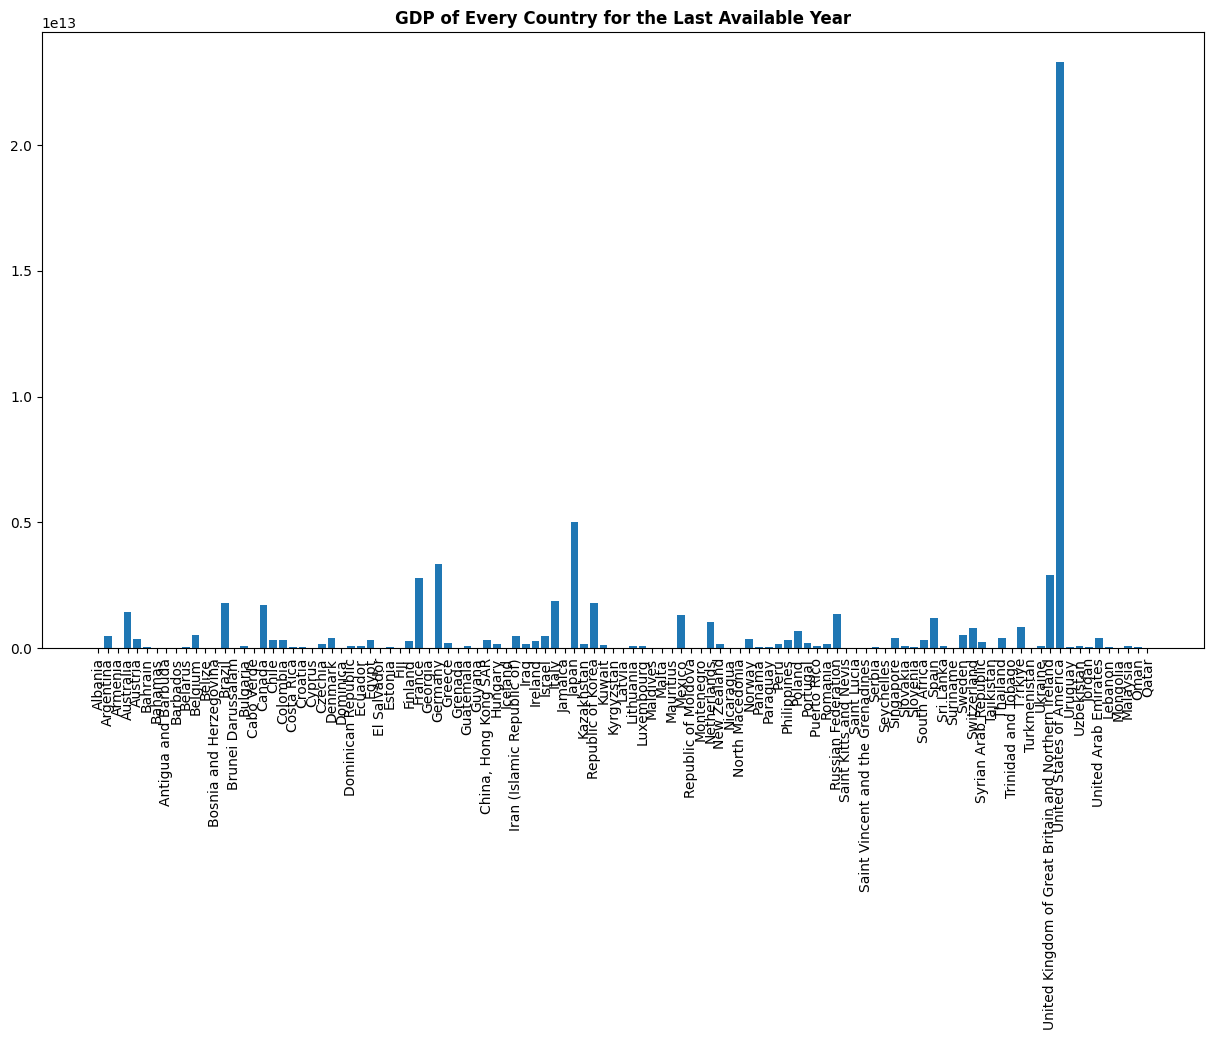

In [50]:
gdp_list = []
rm_list = []
for idx, country in enumerate(countries_list):
    temp = data[data['CountryName'] == country]
    gdp = temp['GDP'].iloc[-1]
    if np.isnan(gdp):
        rm_list.append(idx)
        continue
    else: 
        gdp_list.append(gdp)
countries_list = np.delete(countries_list, rm_list)
fig = plt.figure(figsize=(15,8))
plt.bar(countries_list, gdp_list)
plt.title("GDP of Every Country for the Last Available Year", fontweight="bold")
plt.xticks(rotation=90)
plt.show()

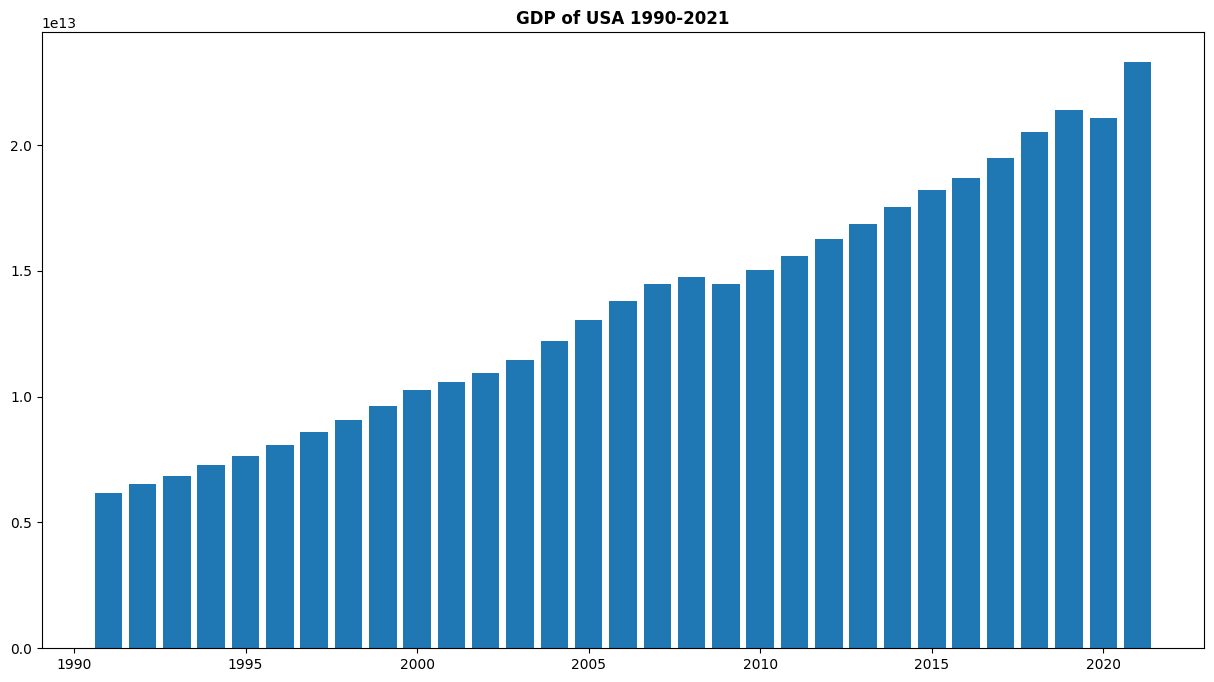

In [62]:
country_df = data[data['CountryName'] == 'United States of America' ]
years = country_df['Year'].unique()
gdp_time = []
for yr in years:
    year_df = country_df[country_df['Year'] == yr]
    cntry_gdp = year_df['GDP'].iloc[-1]
    
    if np.isnan(cntry_gdp):
        cntry_gdp = year_df['GDP'].iloc[-2]
    else: 
        pass
    gdp_time.append(cntry_gdp)

fig = plt.figure(figsize=(15,8))
plt.bar(years, gdp_time)
plt.title("GDP of USA 1990-2021", fontweight="bold")
plt.show()

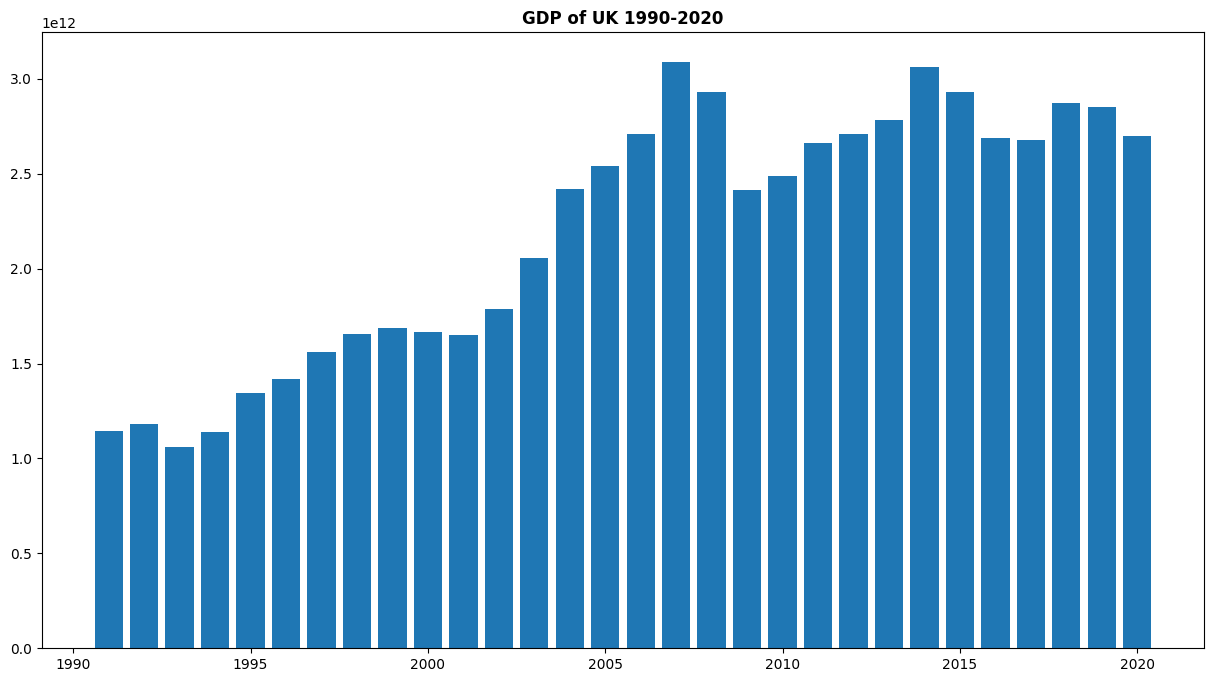

In [65]:
country_df = data[data['CountryName'] == 'United Kingdom of Great Britain and Northern Ireland' ]
years = country_df['Year'].unique()
gdp_time = []
for yr in years:
    year_df = country_df[country_df['Year'] == yr]
    cntry_gdp = year_df['GDP'].iloc[-1]
    
    if np.isnan(cntry_gdp):
        cntry_gdp = year_df['GDP'].iloc[-2]
    else: 
        pass
    gdp_time.append(cntry_gdp)

fig = plt.figure(figsize=(15,8))
plt.bar(years, gdp_time)
plt.title("GDP of UK 1990-2020", fontweight="bold")
plt.show()

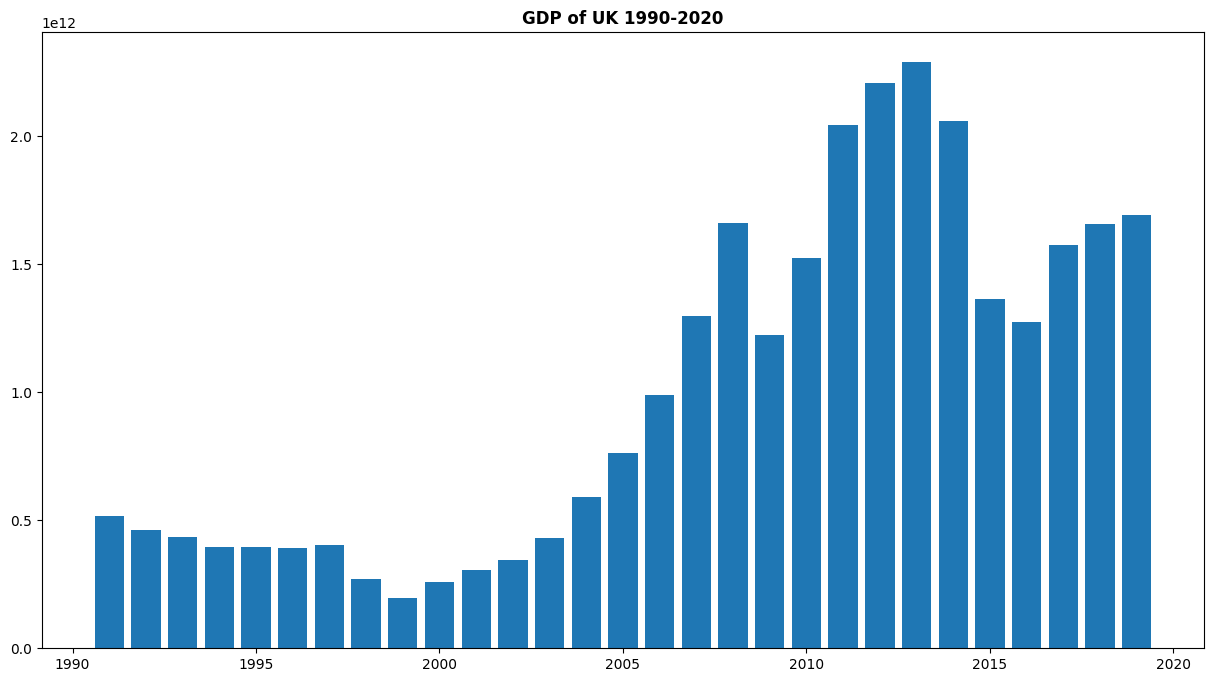

In [66]:
country_df = data[data['CountryName'] == 'Russian Federation' ]
years = country_df['Year'].unique()
gdp_time = []
for yr in years:
    year_df = country_df[country_df['Year'] == yr]
    cntry_gdp = year_df['GDP'].iloc[-1]
    
    if np.isnan(cntry_gdp):
        cntry_gdp = year_df['GDP'].iloc[-2]
    else: 
        pass
    gdp_time.append(cntry_gdp)

fig = plt.figure(figsize=(15,8))
plt.bar(years, gdp_time)
plt.title("GDP of UK 1990-2020", fontweight="bold")
plt.show()